Today i'll be working on custom datasets

A _Custom Dataset_ is basically a collection of data relating to a problem you're working on

It's basically information that hasn't been unrefined into data

For example, images of people you plan to use for trainning your model

In PyTorch in order to be able to work with your custom dataset, you'll have to convert it to data in the form of tensors

I'll be working with a custom dataset containing 3 classes - pizza,steak and sushi

It's already in the standard image classification format.

Image classification format contains seperate classes of images in seperate directories titled with different class names

For example, all images of `pizza` are contained in the `pizza/` directory


The storage format of my dataset is basically like this:
```
pizza_steak_sushi/ <- overall dataset folder
    train/ <- training images
        pizza/ <- class name as folder name
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image24.jpeg
            image25.jpeg
            ...
        sushi/
            image37.jpeg
            ...
    test/ <- testing images
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image154.jpeg
            image155.jpeg
            ...
        sushi/
            image167.jpeg
            ...
```

The goal now will be to take this storage structure and turn it into a dataset usable with PyTorch


In [20]:
# Get the path of my data structure
import os
from pathlib import Path

custom_dataset_path = Path("pizza_steak_sushi") # To get the path of the custom dataset

for dirpath, dirname, filename in os.walk(custom_dataset_path):
    print(f"There are {len(dirname)} folders and {len(filename)} images in {dirpath}") # Just to understand the custom dataset more

There are 2 folders and 0 images in pizza_steak_sushi
There are 3 folders and 0 images in pizza_steak_sushi\test
There are 0 folders and 25 images in pizza_steak_sushi\test\pizza
There are 0 folders and 19 images in pizza_steak_sushi\test\steak
There are 0 folders and 31 images in pizza_steak_sushi\test\sushi
There are 3 folders and 0 images in pizza_steak_sushi\train
There are 0 folders and 78 images in pizza_steak_sushi\train\pizza
There are 0 folders and 75 images in pizza_steak_sushi\train\steak
There are 0 folders and 72 images in pizza_steak_sushi\train\sushi


In [21]:
# I should be able to turn this loop into a function
def walk_through_dir(filepath):
    """
    Walks through a file path or directory path and prints out its contents
    Args:
        filepath (str or pathlib.Path object) : The location of the directory
    
    Returns:
      A print out of:
        number of subdiretories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    for dirpath, dirname, filename in os.walk(filepath):
        print(f"There are {len(dirname)} folders and {len(filename)} images in {dirpath}")

In [22]:
walk_through_dir(custom_dataset_path)

There are 2 folders and 0 images in pizza_steak_sushi
There are 3 folders and 0 images in pizza_steak_sushi\test
There are 0 folders and 25 images in pizza_steak_sushi\test\pizza
There are 0 folders and 19 images in pizza_steak_sushi\test\steak
There are 0 folders and 31 images in pizza_steak_sushi\test\sushi
There are 3 folders and 0 images in pizza_steak_sushi\train
There are 0 folders and 78 images in pizza_steak_sushi\train\pizza
There are 0 folders and 75 images in pizza_steak_sushi\train\steak
There are 0 folders and 72 images in pizza_steak_sushi\train\sushi


Looks like we have have 75 images per training class and 25 per testing class

This custom dataset was actually derived from the PyTorch `Food101` custom dataset but since it was very large I decided to go with this for learning purposes

I might still work with that later on

In [26]:
# Setup train and testing paths
train_path = custom_dataset_path/"train"
test_path = custom_dataset_path/"test"
train_path

WindowsPath('pizza_steak_sushi/train')

Plot an image using `PIL.Image`

Image path: pizza_steak_sushi\test\sushi\3177743.jpg
Image class: sushi
Image dimensions (height,widht): (512,512)


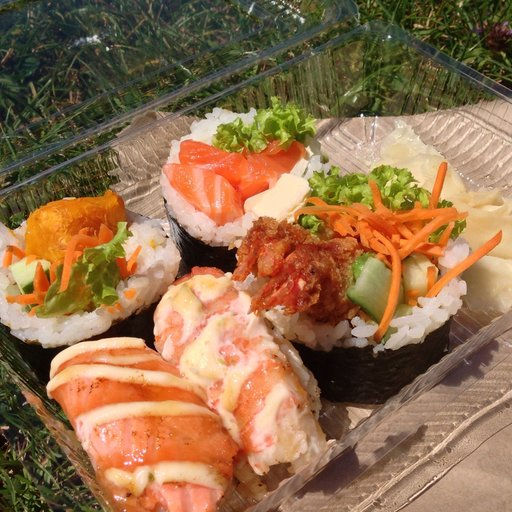

In [40]:
# Visualisation
from PIL import Image
import matplotlib.pyplot as plt
import random

# Get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick random image
rand_image = random.choice(image_path_list)

# Get the random image class name
rand_image_class = rand_image.parent.stem

# Open image
img = Image.open(rand_image)

# Print some image data
print(f"Image path: {rand_image}")
print(f"Image class: {rand_image_class}")
print(f"Image dimensions (height,widht): ({img.height},{img.width})")
img

We can also plot the image with `matplotlib.pyplot.imshow`, except that we have to convert it to a numpy array first

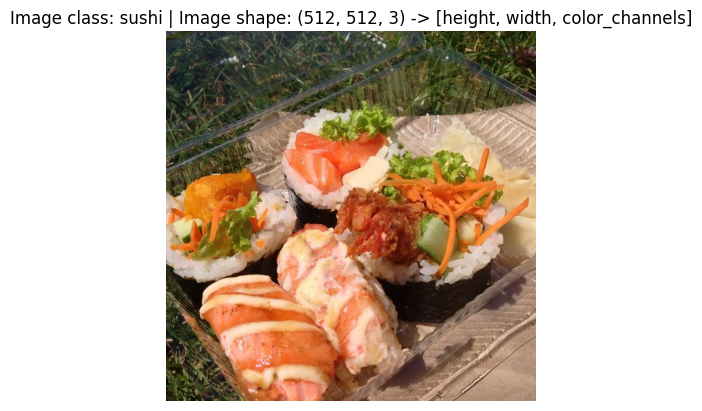

In [45]:
import numpy as np

# Covert it to an array
img_as_array = np.asarray(img)

# PLot
plt.imshow(img_as_array)
plt.title(f"Image class: {rand_image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis("off");

### Transforming the data into tensor with `torchvision.transforms`

In [46]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [48]:
# Write your transform for the image
image_transform = transforms.Compose([
    # Resize the image
    transforms.Resize(size=(64,64)),
    #Flip the image randomly (for model diversity)
    transforms.RandomHorizontalFlip(p=0.5), # probabily of flipping image
    # Turn the image into a tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])


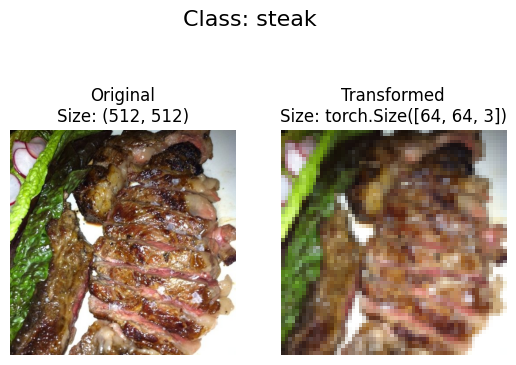

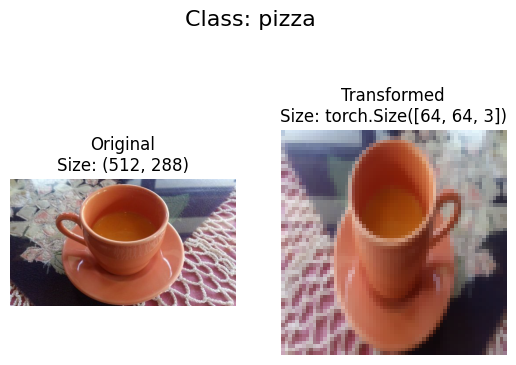

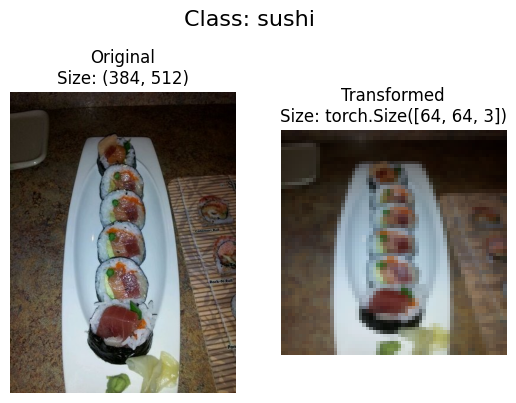

In [52]:
# Making a function to try the transform on random images
def plot_transformed_images(image_path,transform,n=3):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random_image_paths = random.sample(image_path, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transform_image = transform(f).permute(1,2,0)
            ax[1].imshow(transform_image)
            ax[1].set_title(f"Transformed\nSize: {transform_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_path_list, 
                        transform=image_transform, 
                        n=3)

In [54]:
# Use ImageFolder to create datsets
train_data =datasets.ImageFolder(root=train_path, transform=image_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_path, transform=image_transform, target_transform=None)
train_data,test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [56]:
# Get class names 
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [58]:
img,label = train_data[0]
img,label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [59]:
# load data into dataloader
train_dataloader = DataLoader(dataset=train_data, batch_size=1, shuffle=True, num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_data, batch_size=1, shuffle=False, num_workers=os.cpu_count())

### Creating a custom ImageFolder class

In [61]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [81]:
# I'll first try creating a function that can retrun the class names of a given directory
def give_class_name(data_dir:str) -> Tuple[List[str], Dict[str,int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    class_names = sorted([item.name for item in os.scandir(data_dir)])
    class_names_dict = {key:num for num,key in enumerate(class_names)}
    return class_names, class_names_dict

give_class_name(train_path)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a custom ImageFolder class

1. Subclass `torch.utils.data.Dataset`.
2. Initialize our subclass with a `targ_dir` parameter (the target data directory) and `transform` parameter (so we have the option to transform our data if needed).
3. Create several attributes for `paths` (the paths of our target images), `transform` (the transforms we might like to use, this can be `None`), `classes` and `class_to_idx` (from our `find_classes()` function).
4. Create a function to load images from file and return them, this could be using `PIL` or [`torchvision.io`](https://pytorch.org/vision/stable/io.html#image) (for input/output of vision data). 
5. Overwrite the `__len__` method of `torch.utils.data.Dataset` to return the number of samples in the `Dataset`, this is recommended but not required. This is so you can call `len(Dataset)`.
6. Overwrite the `__getitem__` method of `torch.utils.data.Dataset` to return a single sample from the `Dataset`, this is required.

In [87]:

class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir:str, transform=None)-> None:

        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.class_names, self.class_to_idx = give_class_name(targ_dir)
        self.transform = transform

    # Function to load images
    def load_image(self, index:int):
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # Overwrite the len method
    def __len__(self) -> int:
        return len(self.paths)
    
    # Overwrite get item method
    def __getitem__(self, index:int):
        img = self.load_image(index)
        img_class = self.paths[index].parent.name
        img_class_index = self.class_to_idx[img_class]

        if self.transform:
            return self.transform(img), img_class_index
        else:
            return img, img_class_index
    
    



        


### Creating tranformers

In [88]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [89]:
train_data_custom = ImageFolderCustom(targ_dir=train_path, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_path, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x2372f2a2210>,
 <__main__.ImageFolderCustom at 0x2372d7ea590>)

In [90]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [92]:
train_data_custom[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [107]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n >= 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16,8))
    for num, rand_sample in enumerate(random_samples_idx):
        rand_img, rand_label = dataset[rand_sample]
        rand_img_permute = rand_img.permute(1,2,0)
        rand_label = class_names[rand_label]
        plt.subplot(1,n,num+1)
        plt.axis("off")
        plt.imshow(rand_img_permute)
        title = f"Class: {rand_label}"
        if display_shape:
          title += f"\nShape: {rand_img.shape}"
        plt.title(title)
        
        

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


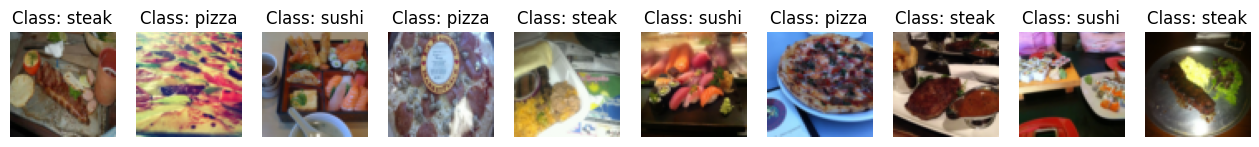

In [108]:
display_random_images(dataset=train_data_custom, classes=train_data_custom.class_names, display_shape=True)